# STOCK PRODUCT ANALYSIS AND PREDICTION PROJECT - GIZ FINAL PROJECT

# Problem Statement
A stock brokerage firm (Coven Financerequires prediction of stock for Company XYZ providing data between 2013 - 2017

# INTRODUCTION
Stock Product Analysis and Prediction is a project on technical analysis, visualization and prediction using data provided by Coven Finance on Company XYZ, which is a technology company. Pandas was used for exploratory analysis and objective view of few ways of analyzing the risk of the stock based on its previous performance history. We therefore can predicted future stock prices after training our model. 
Method used: Multiple Regression!

# Solution
This is a machine learning project aimed at predicting stocks of Company XYZ.
We used Multiple Regression as our dependent variable (label) is continuous and we have multiple independent variables. The dependent variable is the feature created as label, which is the value we want to predict.

# IMPORTING OUR LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib

plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
df = pd.read_csv('EOD-HD.csv', parse_dates = ['Date'])

In [3]:
df.head(10)

,Date,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
0,2017-12-28,190.910,190.9800,189.640,189.78,3175631.0,0.0,1.0,181.803521,181.870182,180.594100,180.727422,3175631.0
1,2017-12-27,190.600,191.4900,190.010,190.19,5912613.0,0.0,1.0,181.508308,182.355855,180.946451,181.117865,5912613.0
2,2017-12-26,188.530,190.4200,188.340,190.36,2969182.0,0.0,1.0,179.537048,181.336894,179.356111,181.279756,2969182.0
3,2017-12-22,188.200,188.4600,187.270,188.13,3256519.0,0.0,1.0,179.222789,179.470387,178.337150,179.156128,3256519.0
4,2017-12-21,187.700,188.8400,187.440,188.08,5859058.0,0.0,1.0,178.746639,179.832261,178.499041,179.108513,5859058.0
5,2017-12-20,187.140,187.9024,186.035,187.31,5383672.0,0.0,1.0,178.213351,178.939384,177.161060,178.375242,5383672.0
6,2017-12-19,185.235,186.7200,184.600,185.98,4496706.0,0.0,1.0,176.399220,177.813385,175.794510,177.108684,4496706.0
7,2017-12-18,183.960,185.4700,183.500,184.73,5011827.0,0.0,1.0,175.185038,176.623011,174.746981,175.918309,5011827.0
8,2017-12-15,183.005,183.2100,182.130,182.58,8201699.0,0.0,1.0,174.275592,174.470814,173.442330,173.870865,8201699.0
9,2017-12-14,183.880,184.0000,182.060,182.13,3542677.0,0.0,1.0,175.108854,175.223130,173.375669,173.442330,3542677.0


In [4]:
df.dtypes

Date          datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume               float64
Dividend             float64
Split                float64
Adj_Open             float64
Adj_High             float64
Adj_Low              float64
Adj_Close            float64
Adj_Volume           float64
dtype: object

In [5]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividend', 'Split',
       'Adj_Open', 'Adj_High', 'Adj_Low', 'Adj_Close', 'Adj_Volume'],
      dtype='object')

In [6]:
df = df[['Date', 'Adj_Open', 'Adj_High', 'Adj_Low', 'Adj_Close', 'Adj_Volume']]

In [7]:
df.head(20)

,Date,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
0,2017-12-28,181.803521,181.870182,180.594100,180.727422,3175631.0
1,2017-12-27,181.508308,182.355855,180.946451,181.117865,5912613.0
2,2017-12-26,179.537048,181.336894,179.356111,181.279756,2969182.0
3,2017-12-22,179.222789,179.470387,178.337150,179.156128,3256519.0
4,2017-12-21,178.746639,179.832261,178.499041,179.108513,5859058.0
5,2017-12-20,178.213351,178.939384,177.161060,178.375242,5383672.0
6,2017-12-19,176.399220,177.813385,175.794510,177.108684,4496706.0
7,2017-12-18,175.185038,176.623011,174.746981,175.918309,5011827.0
8,2017-12-15,174.275592,174.470814,173.442330,173.870865,8201699.0
9,2017-12-14,175.108854,175.223130,173.375669,173.442330,3542677.0


In [8]:
df.set_index('Date',inplace=True)
df.head(10)

,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,
2017-12-28,181.803521,181.870182,180.594100,180.727422,3175631.0
2017-12-27,181.508308,182.355855,180.946451,181.117865,5912613.0
2017-12-26,179.537048,181.336894,179.356111,181.279756,2969182.0
2017-12-22,179.222789,179.470387,178.337150,179.156128,3256519.0
2017-12-21,178.746639,179.832261,178.499041,179.108513,5859058.0
2017-12-20,178.213351,178.939384,177.161060,178.375242,5383672.0
2017-12-19,176.399220,177.813385,175.794510,177.108684,4496706.0
2017-12-18,175.185038,176.623011,174.746981,175.918309,5011827.0
2017-12-15,174.275592,174.470814,173.442330,173.870865,8201699.0


In [9]:
df.describe()

,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
count,1090.000000,1090.000000,1090.000000,1090.000000,1.090000e+03
mean,108.025789,108.797543,107.272647,108.066053,5.415875e+06
std,28.407561,28.544913,28.286563,28.433344,2.274563e+06
min,63.493220,63.997825,62.823314,63.249618,1.517075e+06
25%,82.034051,82.682450,81.226683,81.837022,3.895442e+06
50%,110.150407,110.947492,108.921533,110.228727,4.927485e+06
75%,125.551003,126.334836,124.898251,125.675862,6.349263e+06
max,181.803521,182.355855,180.946451,181.279756,2.075320e+07


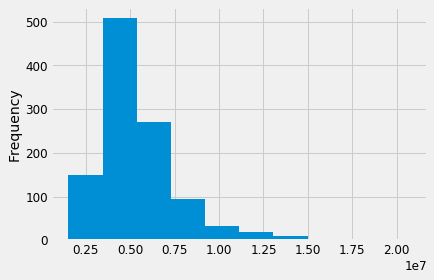

In [10]:
#This is a histogram showing Adjusted Volume
df['Adj_Volume'].plot(x='Adj_Close', y='Adj_Volume', kind='hist')

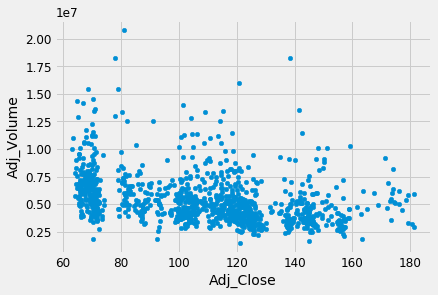

In [11]:
#This shows a scatter plot for the Adjusted Close versus the Adjusted Volume.
#We can see that most of the dots are concentrated around lower volumes bought.
df.plot.scatter(x='Adj_Close', y='Adj_Volume')

C:\Users\PC\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


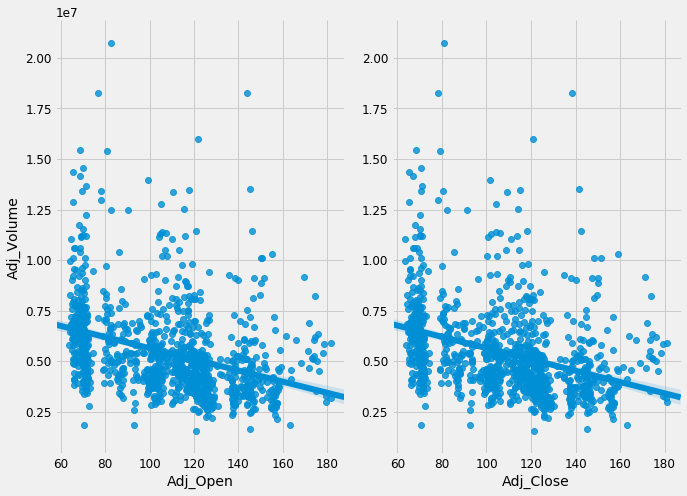

In [12]:
#This is a scatter plot of Adjusted Volume against Adjusted Open and Adjusted Close
sns.pairplot(df, x_vars=['Adj_Open','Adj_Close'], y_vars='Adj_Volume', size=7, aspect=0.7, kind='reg')

C:\Users\PC\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


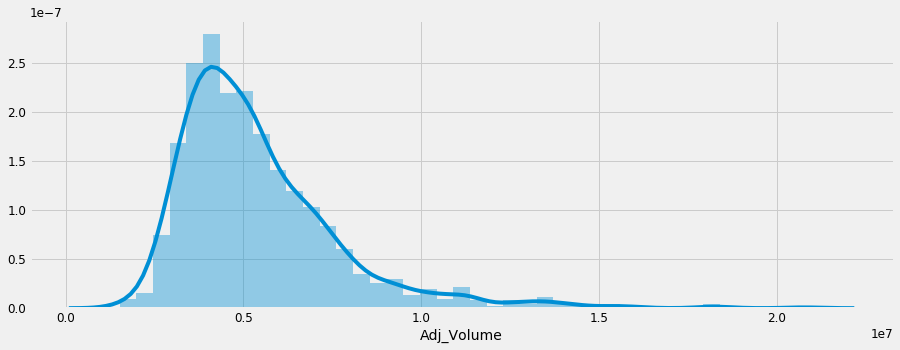

In [13]:
#This is a distribution plot showing the Adjusted Volume
fig = plt.figure()
axes = fig.add_axes([1, 1, 2, 1.0])
sns.distplot(df['Adj_Volume'])

In [14]:
#This shows correlation values for each of the features
df.corr()

,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Adj_Open,1.000000,0.999740,0.999493,0.999371,-0.344570
Adj_High,0.999740,1.000000,0.999407,0.999726,-0.340943
Adj_Low,0.999493,0.999407,1.000000,0.999530,-0.356738
Adj_Close,0.999371,0.999726,0.999530,1.000000,-0.349350
Adj_Volume,-0.344570,-0.340943,-0.356738,-0.349350,1.000000


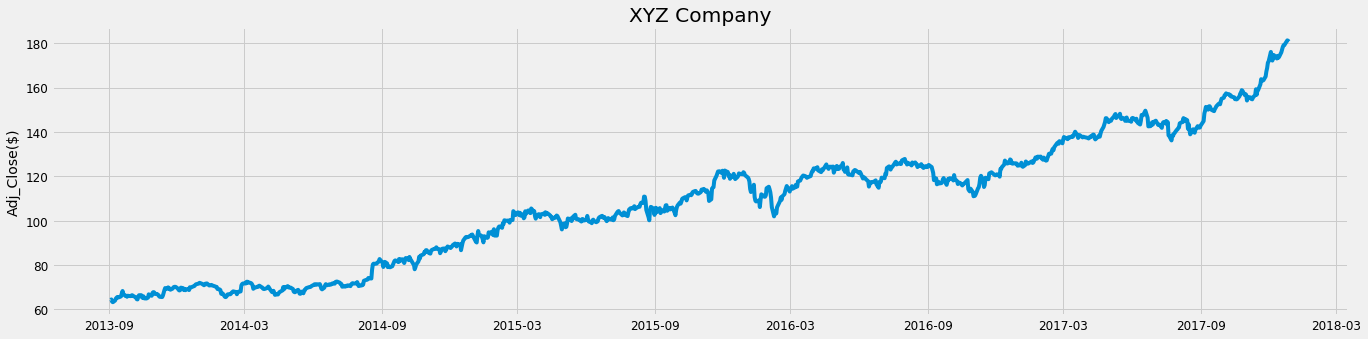

In [15]:
fig = plt.figure()
axes = fig.add_axes([1, 1, 3, 1.0])
axes.plot(df.index, df['Adj_Close'])
plt.title('XYZ Company')
plt.ylabel('Adj_Close($)')
plt.show()

C:\Users\PC\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


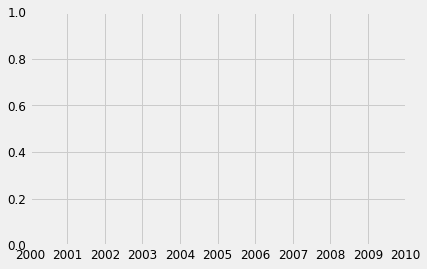

In [20]:
import datetime as dt
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

ax = plt.subplot()
axes = fig.add_axes([1, 1, 2, 1.0])
ax.xaxis_date()
ax.grid(True)
plt.show()

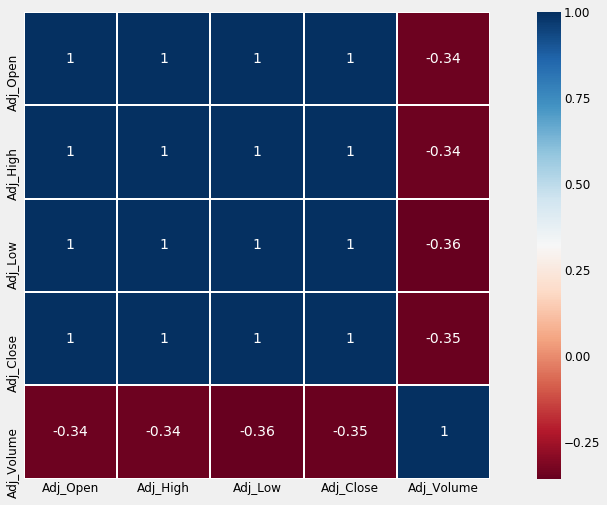

In [21]:
#plot heatmap to find correlation among features
#We can see that Adj_Volume is negatively corellated with all the remaining features observed. 
corrmat = df.corr()
f, ax = plt.subplots(figsize = (15,8))
sns.heatmap(corrmat, square = True, annot = True, linewidth = 0.8, cmap = 'RdBu')

In [24]:
df.head(15)

,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,
2017-12-28,181.803521,181.870182,180.594100,180.727422,3175631.0
2017-12-27,181.508308,182.355855,180.946451,181.117865,5912613.0
2017-12-26,179.537048,181.336894,179.356111,181.279756,2969182.0
2017-12-22,179.222789,179.470387,178.337150,179.156128,3256519.0
2017-12-21,178.746639,179.832261,178.499041,179.108513,5859058.0
2017-12-20,178.213351,178.939384,177.161060,178.375242,5383672.0
2017-12-19,176.399220,177.813385,175.794510,177.108684,4496706.0
2017-12-18,175.185038,176.623011,174.746981,175.918309,5011827.0
2017-12-15,174.275592,174.470814,173.442330,173.870865,8201699.0


In [25]:
#To predict the stocks for 10 days, we create a label after rolling first 10 values in Adj_Close 
df['Adj_Close'] = df['Adj_Close'].rolling(10).mean()

In [26]:
df['Label'] = df['Adj_Close'].shift(-1)

In [27]:
df.head(27)

,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,Label
Date,,,,,,
2017-12-28,181.803521,181.870182,180.594100,NaN,3175631.0,NaN
2017-12-27,181.508308,182.355855,180.946451,NaN,5912613.0,NaN
2017-12-26,179.537048,181.336894,179.356111,NaN,2969182.0,NaN
2017-12-22,179.222789,179.470387,178.337150,NaN,3256519.0,NaN
2017-12-21,178.746639,179.832261,178.499041,NaN,5859058.0,NaN
2017-12-20,178.213351,178.939384,177.161060,NaN,5383672.0,NaN
2017-12-19,176.399220,177.813385,175.794510,NaN,4496706.0,NaN
2017-12-18,175.185038,176.623011,174.746981,NaN,5011827.0,NaN
2017-12-15,174.275592,174.470814,173.442330,NaN,8201699.0,178.010511


In [28]:
df.dropna(inplace=True)

In [29]:
df.head(10) #from the new dataframe, every row have been mapped against its future value. 

,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,Label
Date,,,,,,
2017-12-14,175.108854,175.223130,173.375669,178.010511,3542677.0,177.367709
2017-12-13,173.328054,174.908872,173.318531,177.367709,5176749.0,176.568730
2017-12-12,174.032756,174.470814,172.994749,176.568730,5274935.0,175.796415
2017-12-11,174.175601,174.232739,172.480603,175.796415,6038891.0,175.346929
2017-12-08,173.794681,175.127900,173.470899,175.346929,5091538.0,174.767931
2017-12-07,171.461547,173.870865,171.194903,174.767931,5484611.0,174.147984
2017-12-06,171.652007,173.461376,170.156896,174.147984,6891093.0,173.849914
2017-12-05,175.975447,176.089723,173.565082,173.849914,6347228.0,173.866103
2017-12-04,174.451768,177.422943,174.451768,173.866103,6192507.0,173.660407


# Creating features and labels

In [30]:
X = df[['Adj_Open', 'Adj_High', 'Adj_Low', 'Adj_Close', 'Adj_Volume']]
y = df['Label']

In [31]:
#Let's do some preprocessing but before then, let's convert both the labels and features to np.arrays for easy mathematical calculation
X = np.array(df[['Adj_Open', 'Adj_High', 'Adj_Low', 'Adj_Close', 'Adj_Volume']])
y = np.array(df['Label'])

In [32]:
#import preprocessing
from sklearn import preprocessing, model_selection

In [34]:
X = preprocessing.scale(X) #this is to scale down the features between 0 and -1 for fast computation
X

array([[ 2.4364235 ,  2.40072079,  2.41217223,  2.50435635, -0.82321596],
       [ 2.37226795,  2.38945568,  2.4101043 ,  2.4813657 , -0.10582957],
       [ 2.39765571,  2.3737528 ,  2.39838603,  2.45278917, -0.06272419],
       ...,
       [-1.56680363, -1.58632769, -1.58892469, -1.51728848,  1.99778961],
       [-1.5505052 , -1.56605624, -1.56908773, -1.53446505,  2.46780187],
       [-1.55332608, -1.55670019, -1.54074922, -1.54451584,  1.25286453]])

# Preparing the testing and training dataset
This means we are going to divide the data into two parts. One, for testing and the other for training. For instance 80% of the data will be used for training and the remaining 20% will be used for testing. the testing will be unseen and not shown to the machine and the training will be seen to the machine learning model.

In [35]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20, random_state=1)

In [36]:
#let's pass the training data into our machine learning algorithm so that the machine can learn from it.
from sklearn.linear_model import LinearRegression

In [37]:
#To create an instance of the linear regression model
reg = LinearRegression() 
#The code below will map the X_train and y_train and create a hypotesis.
reg.fit(X_train, y_train) 
#After the hypotesis is done, it will plot a best fit line between the X and the y to give us 
#the right prediction for the unseen data. 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Checking for Accuracy

In [38]:
accuracy = reg.score(X_test, y_test)
accuracy

0.9999599379720033

In [39]:
y_pred=reg.predict(X_test) # now predict

# Statsmodels
This is a Python package that allows users to explore statistical data. It estimates statistical models and performs statistical tests. The next two cells below are an application of statsmodel.

In [40]:
from sklearn.metrics import classification_report
import statsmodels.api as sm

C:\Users\PC\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [41]:
x = sm.add_constant(X)
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.377e+06
Date:                Sat, 21 Dec 2019   Prob (F-statistic):               0.00
Time:                        20:51:38   Log-Likelihood:                 341.37
No. Observations:                1080   AIC:                            -670.7
Df Residuals:                    1074   BIC:                            -640.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        107.8855      0.005      2e+04      0.000     107.875     107.896
x1             2.0017      0.258      7.752      0.000       1.495       2.508
x2             1.7785      0.263      6.759      0.000       1.262       2.295
x3             0.3280      0.194      1.689      0.092      -0.053       0.709
x4            23.8022      0.075    316.609      0.000      23.655      23.950
x5            -0.0230      0.007     -3.464      0.001      -0.036      -0.010
==============================================================================
Omnibus:                       80.293   Durbin-Watson:                   0.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              280.433
Skew:                           0.287   Prob(JB):                     1.27e-61
Kurtosis:                       5.429   Cond. No.                         129.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
#calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9999599379720033

# P -value
When talking statistics, a p-value for a statistical model is the probability that when the null hypothesis is true, the statistical summary is equal to or greater than the actual observed results. 
This is also termed 'probability value' or 'asymptotic significance'.
The P-value is seen in the Statsmodel above. And a good P-value is expected to be below 0.05.

# SOME METRICS FOR REGRESSION TASKS (continuous variables prediction)

In [43]:
#R squared value
#Mean Squared Error
#Mean absolute error
#Variance score

# Calculating the R squared value
R-squared measures how closely the data fits the regression line.
So the R-squared in a simple regression is related to the correlation between the two variables. 
In particular, the magnitude of the correlation is the square root of the R-squared.
The sign of the correlation is the sign of the regression coefficient.


In [44]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


0.9999599379720033

In [45]:
#Rounding the R Squared score 
print("R2 score : %.2f" % r2_score(y_test,y_pred))

R2 score : 1.00


In [46]:
#How to calculate MSE
#Calculate the difference between each pair of the observed and predicted value.
#Take the square of the difference value.
#Add each of the squared differences to find the cumulative values.
#In order to obtain the average value, divide the cumulative value by the total number of items in the list.

# Mean absolute error

In [47]:
#This is the difference between the measured or inferred value of a quantity and its actual value.
#The absolute error of the sum or difference of a number of quantities is
#less than or equal to the sum of their absolute errors.
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.13252731757474756

# Calculating Variance score

In [48]:
#Explained variance (also called explained variation) is used to measure the discrepancy between a model and actual data.
#Higher percentages of explained variance indicates a stronger strength of association. 
#It also means that you make better predictions (Rosenthal & Rosenthal, 2011).
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)

0.9999605712457432